<a href="https://colab.research.google.com/github/JuanZapa7a/covid-19/blob/master/Chest_Xray_Classification_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. CONFIGURACIÓN.

## GPU

Antes de comenzar nos aseguramos el acceso a la GPU y que no hay fallos posibles de acceso a ella.

Menú:

`entorno de ejecución---cambiar tipo de entorno de ejecución---T4GPU`

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Como se comprueba estamos utilizando un driver NVIDIA y CUDA.

CUDA es un acrónimo de "Compute Unified Device Architecture" (Arquitectura Unificada de Dispositivos de Cómputo). Es una plataforma de computación paralela desarrollada por NVIDIA que permite utilizar la potencia de procesamiento de las tarjetas gráficas (GPU) para realizar cálculos de propósito general, además de sus tareas tradicionales relacionadas con gráficos y visualización.

Las GPU, que originalmente se diseñaron para manejar gráficos y renderización, tienen una gran cantidad de núcleos de procesamiento que pueden realizar cálculos simultáneos a gran velocidad. CUDA proporciona un entorno de programación y una API (Interfaz de Programación de Aplicaciones) que permite a los desarrolladores escribir código que se ejecuta en la GPU en lugar de la CPU, lo que puede acelerar significativamente ciertas tareas computacionales.

CUDA se utiliza en una variedad de aplicaciones y campos, como la simulación, el aprendizaje automático, la investigación científica, la visualización 3D, el procesamiento de imágenes y video, y más. Numerosas bibliotecas y frameworks populares, como TensorFlow y PyTorch, tienen soporte para CUDA, lo que permite a los desarrolladores aprovechar la potencia de las GPU para acelerar sus aplicaciones y algoritmos.

En resumen, CUDA es una tecnología desarrollada por NVIDIA que permite aprovechar la capacidad de procesamiento de las GPU para tareas de propósito general, lo que ha tenido un impacto significativo en campos que requieren cálculos intensivos y paralelización.

## CONFIGURACION DE `/content` y `/content/datasets`

Guardamos el directorio raiz del proyecto '/content' como el 'HOME' ya que nos vamos a mover por el directorio para poder tener varios proyectos bajo el mismo HOME. Además tendremos los datasets en el directorio dataset y así, de este modo, todos los datasets están facilmente disponibles para cualquier proyecto.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## INSTALAR PAQUETES CON !PIP

Instalmos los paquetes python necesarios (si no estan ya instalados, por defecto). La salida es borrada al final para no inundar la salida de la celda, solo dejamos el checking de ultralytics el "hogar" de yolov8.

In [3]:
# Pip install method (recommended)

!pip install --upgrade pip
!pip install torch torchvision torchaudio
!pip install roboflow
!pip install ultralytics

# Borra la salida de la instalación !pip
from IPython import display
display.clear_output()

# comprobar paquete y hardware
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/107.7 GB disk)


Cargamos Yolov8 y dejamos preparado la visualización de imagenes dentro del
notebook. Asi de esta manera no es necesario usar matplotlib y todo es mas
directo. YoloV8 (en su entrenamiento, validación e inferencia) guarda los
resultados parciales en formato png y csv.

In [13]:
from ultralytics import YOLO

# [DATASET PARA CLASIFICACIÓN](https://docs.ultralytics.com/datasets/classify/)

Creamos el directorio datasets (si no existe), en él vamos a guardar el dataset
con el cual voy a entrenar yolov8.

In [4]:
import os

# Crear el directorio si no existe
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


Para crear un archivo ZIP de un conjunto de datos para exportarlo desde el SDK de Python, utiliza el método 'project.export()'. Para descargar el archivo ZIP, utiliza el método 'project.download()'.

```
version.download(model_format="yolov5", location="./downloads")

```

**[Roboflow](https://roboflow.com/)** es una plataforma que permite gestionar conjuntos de datos para tareas de visión por computadora, y ofrece herramientas para etiquetar, transformar y descargar conjuntos de datos. Si deseas descargar un conjunto de datos desde Roboflow, puedes utilizar un snippet de código proporcionado por la plataforma. Aquí hay un ejemplo de cómo funciona un snippet típico de Roboflow para descargar un conjunto de datos:

1. En Roboflow, selecciona el conjunto de datos que deseas descargar o configurar para su descarga.

2. Busca la opción de "Export" o "Download" en la interfaz de usuario de Roboflow.

3. Roboflow generará un código snippet que puedes copiar y pegar en tu entorno de desarrollo, generalmente en Python.

4. Asegúrate de que tengas instaladas las bibliotecas o dependencias necesarias en tu entorno para ejecutar el código snippet.

5. Ejecuta el código snippet en tu entorno. El código suele incluir instrucciones para descargar el conjunto de datos y, a menudo, se proporciona en forma de URL o mediante llamadas a API.

Ten en cuenta que los detalles específicos del código snippet pueden variar según cómo haya configurado Roboflow tu conjunto de datos y qué opciones de descarga se ofrezcan. Si tienes acceso a un conjunto de datos específico en Roboflow y deseas obtener un código snippet, te recomiendo consultar la documentación o la ayuda de Roboflow para obtener instrucciones precisas sobre cómo descargar tu conjunto de datos en tu entorno de desarrollo.

In [5]:
# Cambiar al directorio creado
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())

# importar dataset (snipet roboflow)
from roboflow import Roboflow

rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk") #API key
project = rf.workspace("universidad-baiw9").project("chest-xray-images-virus-bacteri")
dataset = project.version(2).download("folder")

dataset_dir = /content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chest-Xray-Images-(virus,bacteri-2 in folder:: 100%|██████████| 9908/9908 [00:10<00:00, 918.78it/s] 


In [ ]:
# IMPORTANTE Cambiar en datasets val por valid
# IMPORTANTE: la variable dataset.location guarda la dirección donde
# se ha guardado el dataset Roboflow
print(dataset.location)

/content/datasets/Chest-Xray-Images-(virus,bacteri-1


## VISUALIZAR DATASET (MUESTRAS)

### [GLOB](https://docs.python.org/3/library/glob.html)

El módulo `glob` es una parte de la biblioteca estándar de Python que proporciona una manera de realizar búsquedas de archivos basadas en patrones de nombres de archivo. El objetivo principal de `glob` es permitirte encontrar y seleccionar archivos o directorios que coincidan con ciertos patrones de nombres de archivo en un directorio o una ubicación específica en tu sistema de archivos. Algunas de las principales características y funcionalidades del módulo `glob` incluyen:

1. **Búsqueda por patrones:** Puedes utilizar caracteres comodín, como `*` (cualquier cantidad de caracteres) y `?` (un solo carácter), para buscar archivos que coincidan con patrones específicos de nombres de archivo.

2. **Listado de archivos:** Puedes usar `glob.glob()` para obtener una lista de archivos que coincidan con el patrón de búsqueda en un directorio específico.

3. **Recursión de directorios:** El módulo `glob` permite buscar archivos en directorios y subdirectorios anidados utilizando patrones de búsqueda.

4. **Portabilidad:** `glob` es parte de la biblioteca estándar de Python, lo que significa que está disponible en la mayoría de las instalaciones de Python sin necesidad de instalar paquetes adicionales.

5. **Facilidad de uso:** Proporciona una interfaz simple y efectiva para buscar archivos en función de patrones de nombres de archivo.

Aquí hay un ejemplo de cómo utilizar `glob` para buscar archivos en un directorio que coincidan con un patrón:

```python
import glob

# Buscar archivos .txt en el directorio actual de manera recursiva
archivos_txt = glob.glob("*.txt",recursive=True)

# Imprimir la lista de archivos encontrados
print(archivos_txt)
```

En este ejemplo, `glob.glob("*.txt")` buscará todos los archivos con extensión `.txt` en el directorio actual (y subdirectorios) y devolverá una lista de rutas de archivos que coinciden con el patrón.

En resumen, el módulo `glob` es una herramienta útil para realizar búsquedas de archivos basadas en patrones en Python, lo que facilita la manipulación y procesamiento de archivos en tu código de manera eficiente.

Podemos visualizar las imagenes proporcionadas por GLOB con:

### A. [IPYTHON.DISPLAY](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)

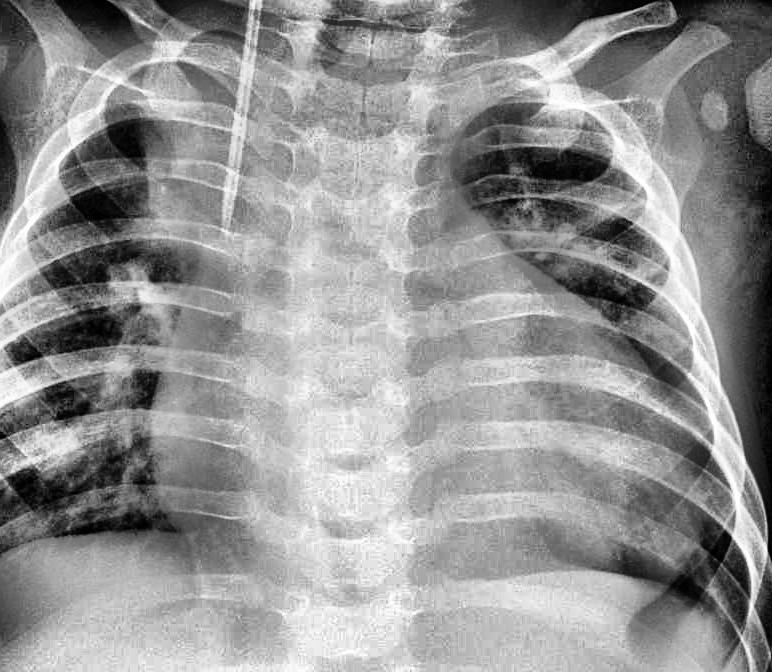

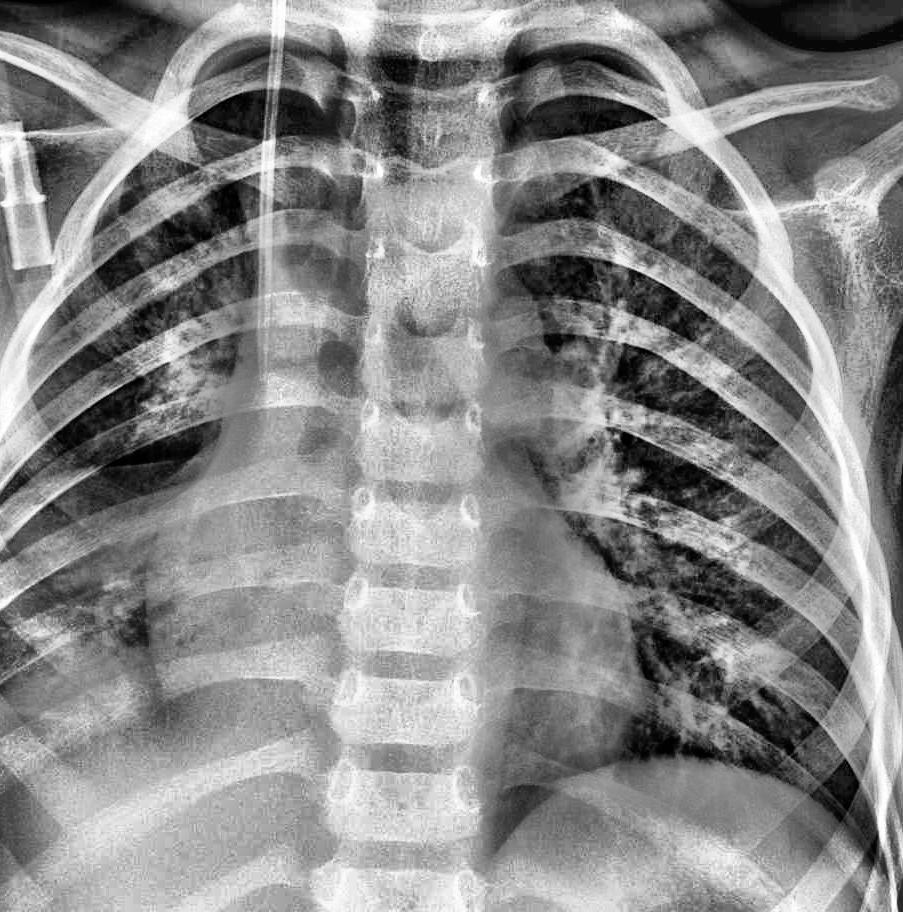

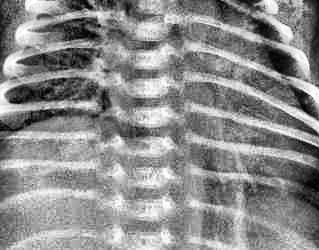

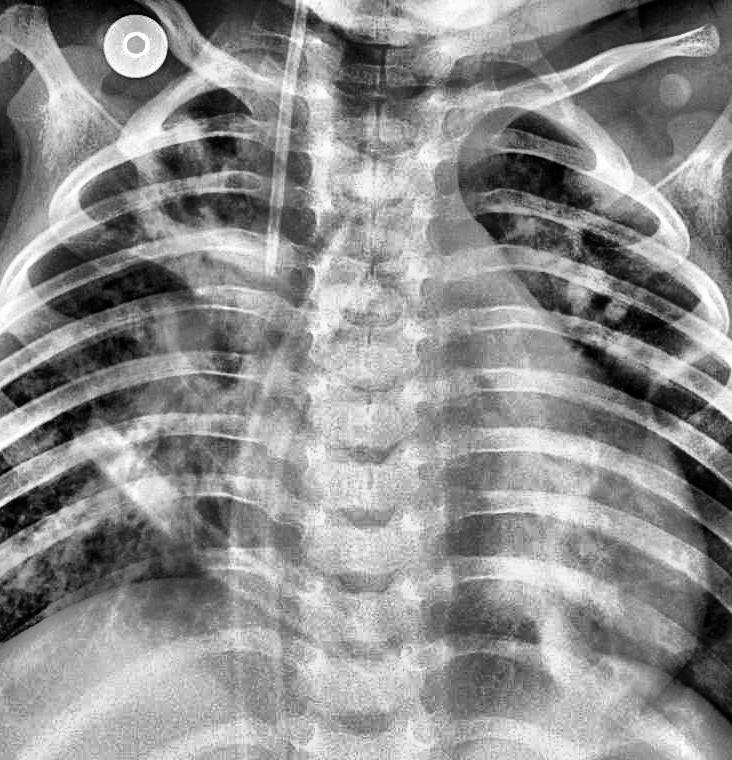

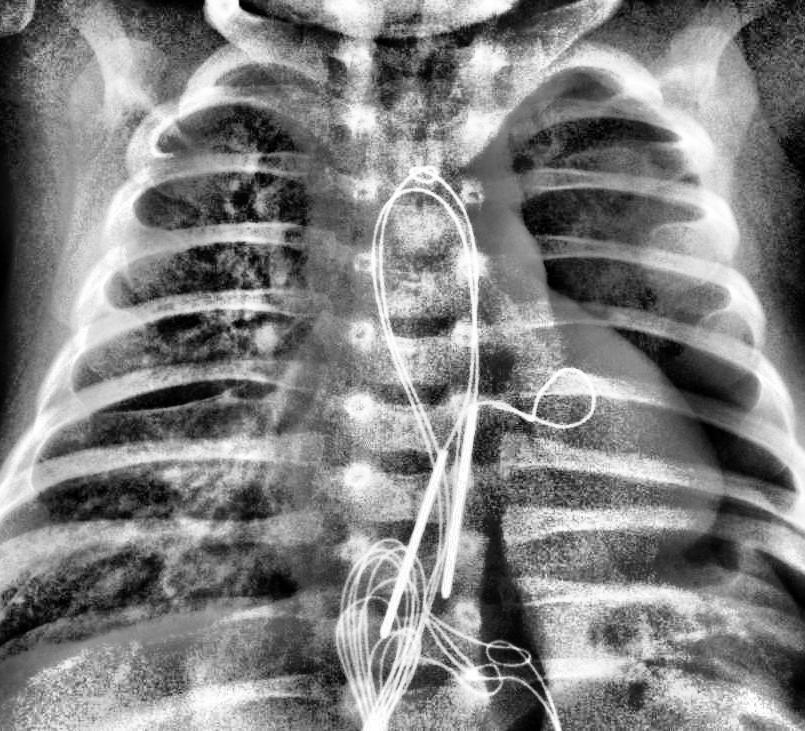

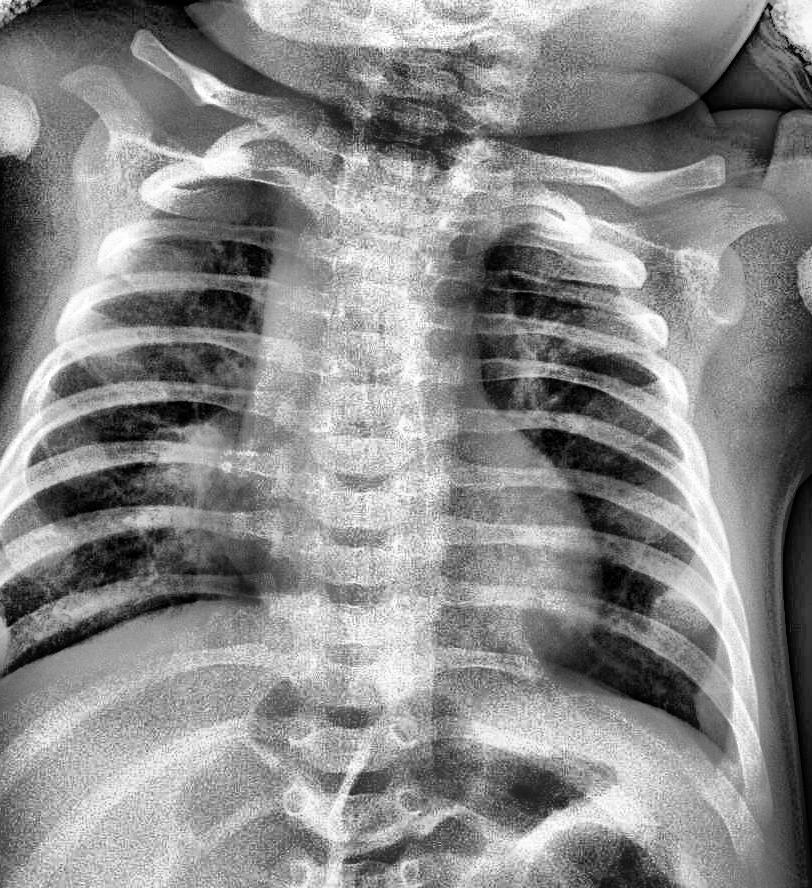

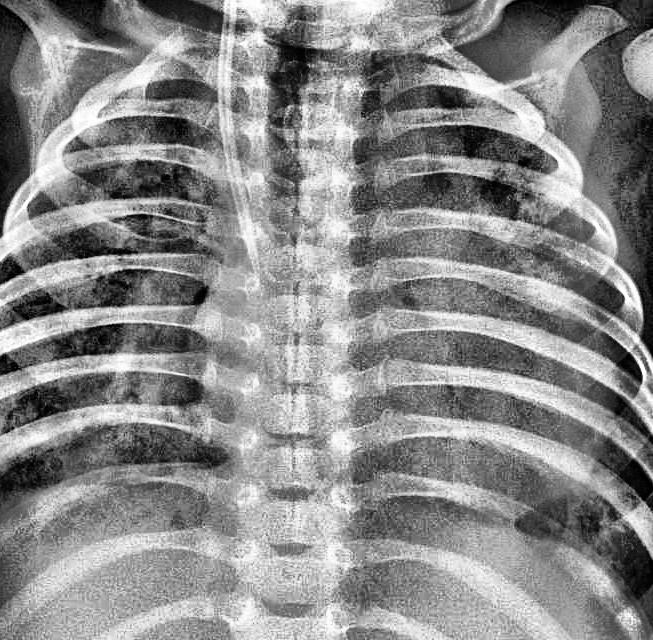

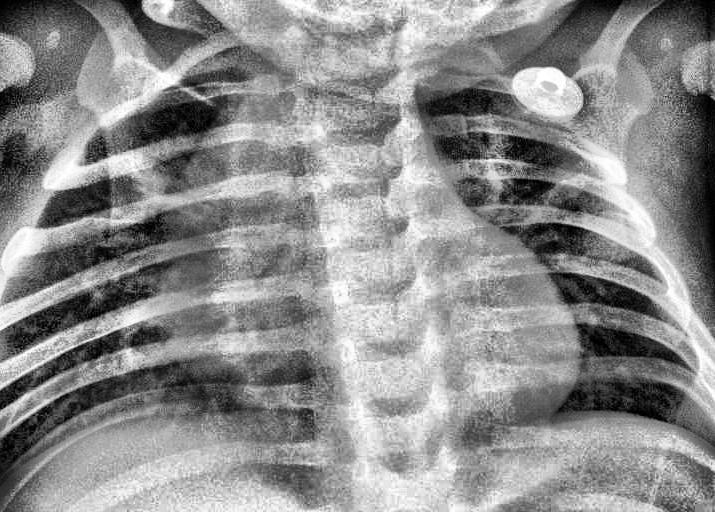

In [6]:
# Vamos a visualizar algunas imagenes del dataset.
from IPython.display import display, Image
import glob

for image_path in glob.glob(f'{dataset.location}/test/bacteria/*.jpg')[:8]:
    display(Image(filename=image_path, width=600))
    print("\n")


### B. [MATPLOTLIB.IMAGE](https://matplotlib.org/stable/api/imag#e_api.html)

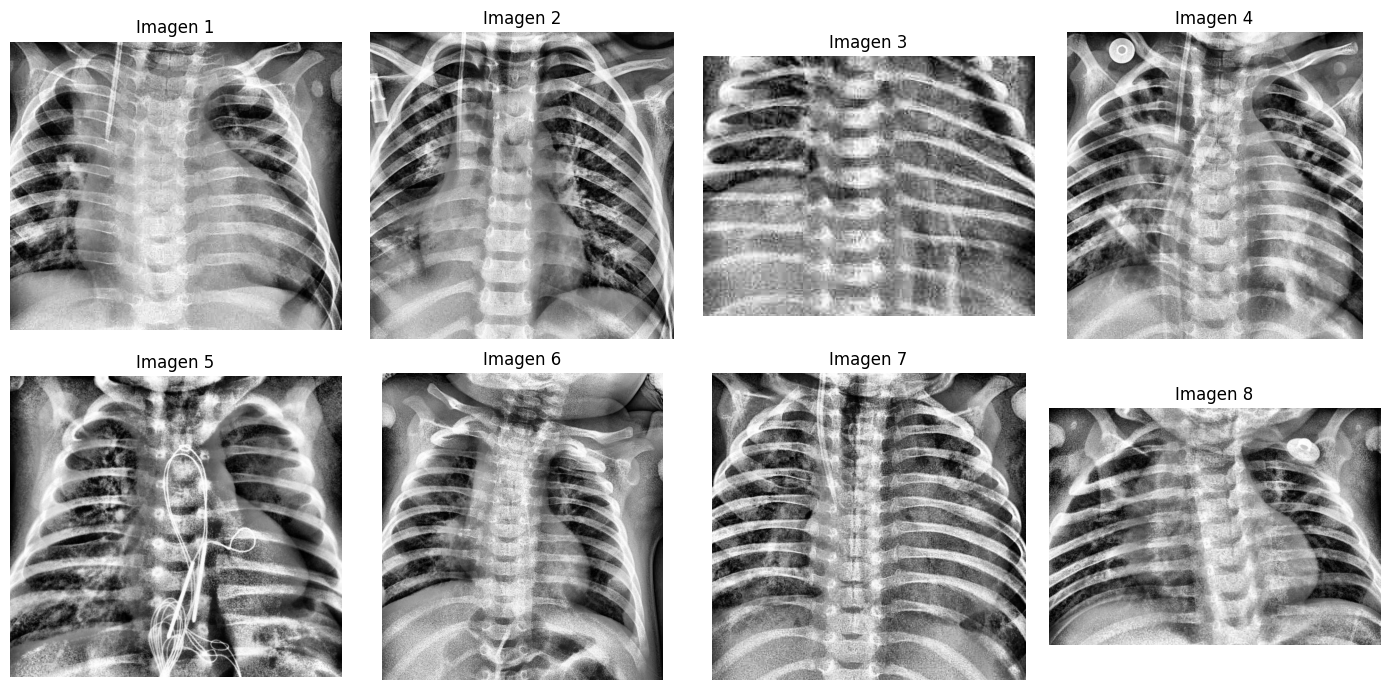

In [7]:
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directorio de las imágenes
image_directory = f'{dataset.location}/test/bacteria/'

# Lista de rutas de las imágenes
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Configura la figura con subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Itera a través de las imágenes y muéstralas en los subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Ajusta la disposición de los subplots
plt.tight_layout()
plt.show()


### C. [PIL/PILLOW](https://pillow.readthedocs.io/en/stable/)

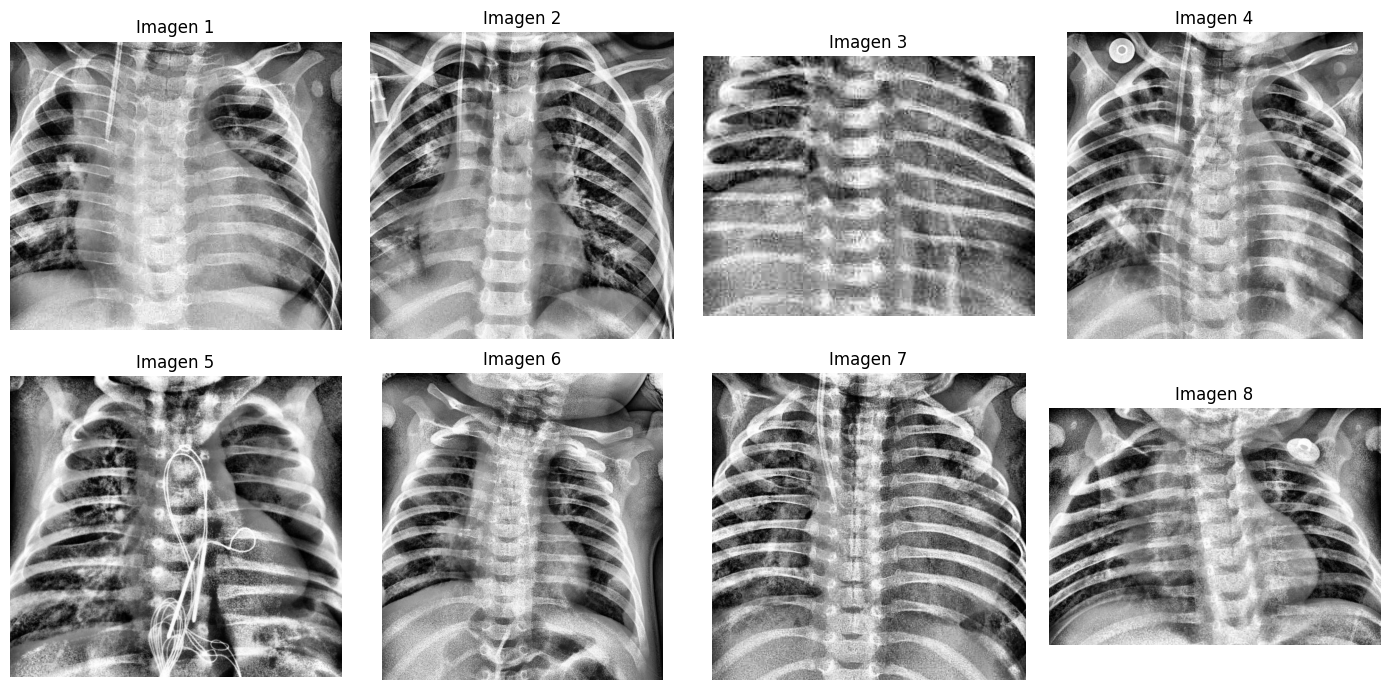

In [8]:
from PIL import Image
import glob
import matplotlib.pyplot as plt


# Directorio de las imágenes
image_directory = f'{dataset.location}/test/bacteria/'

# Lista de rutas de las imágenes
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Configura la figura con subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Itera a través de las imágenes y muéstralas en los subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = Image.open(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Ajusta la disposición de los subplots
plt.tight_layout()
plt.show()

### D. [OpenCV](https://opencv.org/)

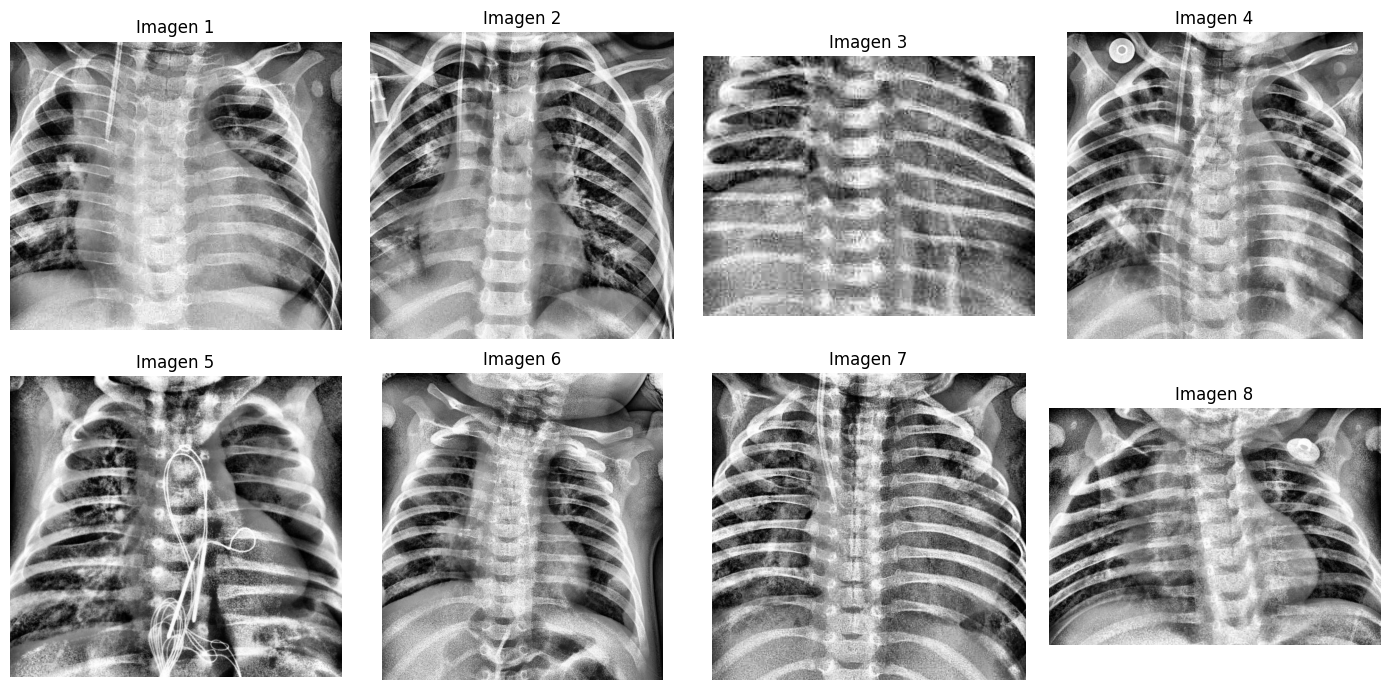

In [9]:
import cv2
import glob
import matplotlib.pyplot as plt


# Directorio de las imágenes
image_directory = f'{dataset.location}/test/bacteria/'

# Lista de rutas de las imágenes
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Configura la figura con subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Itera a través de las imágenes y muéstralas en los subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Ajusta la disposición de los subplots
plt.tight_layout()
plt.show()

### E. [SCIKIT-IMAGE](https://scikit-image.org/)

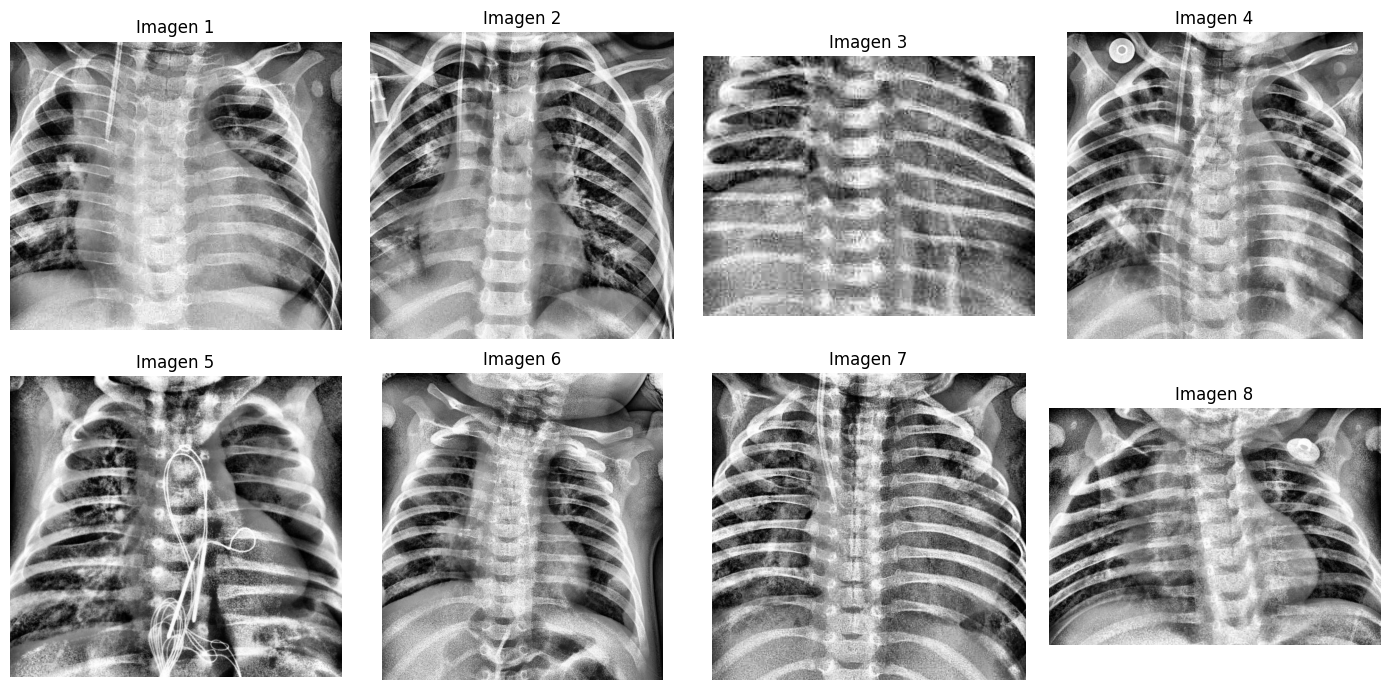

In [10]:
import matplotlib.pyplot as plt
from skimage import io
import glob

# Directorio de las imágenes
image_directory = f'{dataset.location}/test/bacteria/'

# Lista de rutas de las imágenes
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Configura la figura con subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Itera a través de las imágenes y muéstralas en los subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = io.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Imagen {i + 1}')
    axs[row, col].axis('off')

# Ajusta la disposición de los subplots
plt.tight_layout()
plt.show()


# [TRAIN (ULTRALYTICS YOLOV8)](https://docs.ultralytics.com/modes/train/)

"YOLOv8" es una versión oficial de la serie YOLO (You Only Look Once) de modelos de detección de objetos. La serie YOLO es conocida por su evolución constante, y han ocurrido diversos desarrollos hasta la fecha.

La serie YOLO se destacó por su enfoque en la detección de objetos en tiempo real con una sola pasada de la red neuronal a través de la imagen, lo que lo hizo muy eficiente. Los modelos YOLO anteriores, como YOLOv3, YOLOv4 y YOLOv5, eran conocidos por su rendimiento y precisión en la detección de objetos en imágenes y videos.

Para obtener información actualizada sobre cualquier versión posterior de la serie YOLO, te recomiendo consultar las fuentes oficiales, como el repositorio de código abierto en [GitHub](https://github.com/ultralytics) y la [documentación asociada](https://docs.ultralytics.com/).

YOLOv8 es la versión más reciente de YOLO (You Only Look Once) desarrollada por Ultralytics. Como un modelo de última generación, líder en su clase (SOTA, por sus siglas en inglés), YOLOv8 se basa en el éxito de las versiones anteriores, introduciendo nuevas características y mejoras para un mejor rendimiento, flexibilidad y eficiencia. YOLOv8 admite una amplia gama de tareas de visión artificial, que incluyen detección, segmentación, estimación de pose, seguimiento y clasificación. Esta versatilidad permite a los usuarios aprovechar las capacidades de YOLOv8 en diversas aplicaciones y dominios. Esto significa que YOLOv8 es aplicable a una variedad de tareas en el campo de la inteligencia artificial, como la detección y seguimiento de objetos, segmentación de imágenes, estimación de poses, clasificación y más. Estas mejoras y características adicionales hacen de YOLOv8 un modelo de vanguardia en el campo de la visión por computadora.

Las características clave y las mejoras en YOLOv8, según la información proporcionada, incluyen:

- **Versatilidad**: YOLOv8 admite una amplia variedad de tareas de visión por computadora, como detección de objetos, segmentación, estimación de postura, seguimiento y clasificación. Esta versatilidad lo hace aplicable a una amplia gama de aplicaciones y dominios.

- **Rendimiento mejorado**: YOLOv8 probablemente incluye mejoras de rendimiento en comparación con sus predecesores, lo cual es un objetivo común en el desarrollo de nuevas versiones. El rendimiento mejorado puede implicar una mayor precisión, tiempos de inferencia más rápidos o ambas cosas.

- **Flexibilidad**: La flexibilidad de YOLOv8 es un aspecto esencial, ya que permite a los usuarios adaptar el modelo a diversas tareas y escenarios. La capacidad de manejar diferentes tareas de visión por computadora puede ser valiosa para aplicaciones prácticas.

- **Estado del arte**: Ser un modelo de última generación sugiere que YOLOv8 incorpora los avances más recientes en detección de objetos e investigación en visión por computadora.

- **Soporte para diversas aplicaciones**: Las capacidades de YOLOv8 en diferentes tareas de inteligencia artificial en visión abren posibilidades para aplicaciones en campos como vehículos autónomos, vigilancia, atención médica y más.

#### [Clasificación](https://docs.ultralytics.com/tasks/classify/)

La clasificación de imágenes es la tarea más simple de las tres y consiste en clasificar una imagen completa en una de un conjunto de clases predefinidas.

La salida de un clasificador de imágenes es una única etiqueta de clase y una puntuación de confianza. La clasificación de imágenes es útil cuando solo necesitas saber a qué clase pertenece una imagen y no necesitas conocer la ubicación exacta de los objetos de esa clase ni su forma precisa.

Los [modelos](https://github.com/ultralytics/ultralytics/tree/main/ultralytics/cfg/models) YOLOv8 para clasificación utilizan el sufijo `"-cls"`, es decir, "yolov8n-cls.pt" y están preentrenados en [ImageNet](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/ImageNet.yaml).



In [14]:
# Volver a HOME desde el directorio dataset
os.chdir(HOME)
print(os.getcwd())

# Empezar a entrenar. Si no existe ".pt" en el directorio actual se descargará.
model = YOLO('yolov8n-cls.pt') # nano-classification model.

classification_train = model.train(data=f'{dataset.location}', imgsz=256, epochs=2, save=True)

/content


100%|██████████| 5.28M/5.28M [00:00<00:00, 57.4MB/s]
Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/Chest-Xray-Images-(virus,bacteri-2, epochs=2, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, cl

Lo que hace este proceso , es que yolov8 es entrenada (train) frente al subconjunto `train` y validada (Validating) frente a `test`. Cada vez que se entrena, obtenemos una subcarpeta con los resultados (train, train1, train2, etc) en la carpeta `runs`.Imaginemos, que después de varias pruebas hemos decidido que el mejor entrenamiento esta en train2.

Vemos también, que tenemos diferentes resultados para train2 y dos modelos de red guardados en weights, el mejor (`best.pt`) y el último (`last.pt`). El entrenamiento por último utiliza elmejor modelo de entrenamiemnto para un unaltima validación con `best.pt`. Vamos a ver que resultados nos proporciona train2.

`classify_train.save_dir` tiene el ultimo directorio donde se ha salvado los resultados del entrenamiento, pero a veces es mejor usar un entrenamiento previo, por eso en lugar de usar `classify_train.save-dir` vamos a utilizar una leve modificación que nos permita utilizar ''a mano'' cualquier resultado de entrenamiento.

## VISUALIZAR RESULTADOS ENTRENAMIENTO

In [16]:
classify_train_save_dir= os.path.join(HOME,'runs/classify/train')

print(os.listdir(classify_train_save_dir),'\n')

!ls -la {classify_train_save_dir}

['results.csv', 'train_batch2.jpg', 'args.yaml', 'val_batch0_pred.jpg', 'train_batch1.jpg', 'val_batch1_pred.jpg', 'confusion_matrix.png', 'results.png', 'val_batch0_labels.jpg', 'val_batch2_labels.jpg', 'val_batch1_labels.jpg', 'events.out.tfevents.1698217456.ec945576b4d7.206.0', 'train_batch0.jpg', 'weights', 'confusion_matrix_normalized.png', 'val_batch2_pred.jpg'] 

total 3068
drwxr-xr-x 3 root root   4096 Oct 25 07:26 .
drwxr-xr-x 3 root root   4096 Oct 25 07:04 ..
-rw-r--r-- 1 root root   1439 Oct 25 07:04 args.yaml
-rw-r--r-- 1 root root 114624 Oct 25 07:26 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 106820 Oct 25 07:26 confusion_matrix.png
-rw-r--r-- 1 root root 189144 Oct 25 07:28 events.out.tfevents.1698217456.ec945576b4d7.206.0
-rw-r--r-- 1 root root    576 Oct 25 07:26 results.csv
-rw-r--r-- 1 root root 116956 Oct 25 07:26 results.png
-rw-r--r-- 1 root root 276866 Oct 25 07:04 train_batch0.jpg
-rw-r--r-- 1 root root 263529 Oct 25 07:04 train_batch1.jpg
-rw-r--r--

In [17]:
!cat {classify_train_save_dir}/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                0.18186,                0.79744,                      1,                0.39704,             0.00023753,             0.00023753,             0.00023753
                      2,                0.12728,                0.79658,                      1,                0.38606,             0.00024014,             0.00024014,             0.00024014


In [18]:
!pip install pandas

In [19]:
import pandas as pd

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(f'{classify_train_save_dir}/results.csv')
df.head(10)
# Mostrar los primeros 10 registros
print(df.head(10))

                     epoch               train/loss    metrics/accuracy_top1  \
0                        1                  0.18186                  0.79744   
1                        2                  0.12728                  0.79658   

     metrics/accuracy_top5                 val/loss                   lr/pg0  \
0                        1                  0.39704                 0.000238   
1                        1                  0.38606                 0.000240   

                    lr/pg1                   lr/pg2  
0                 0.000238                 0.000238  
1                 0.000240                 0.000240  


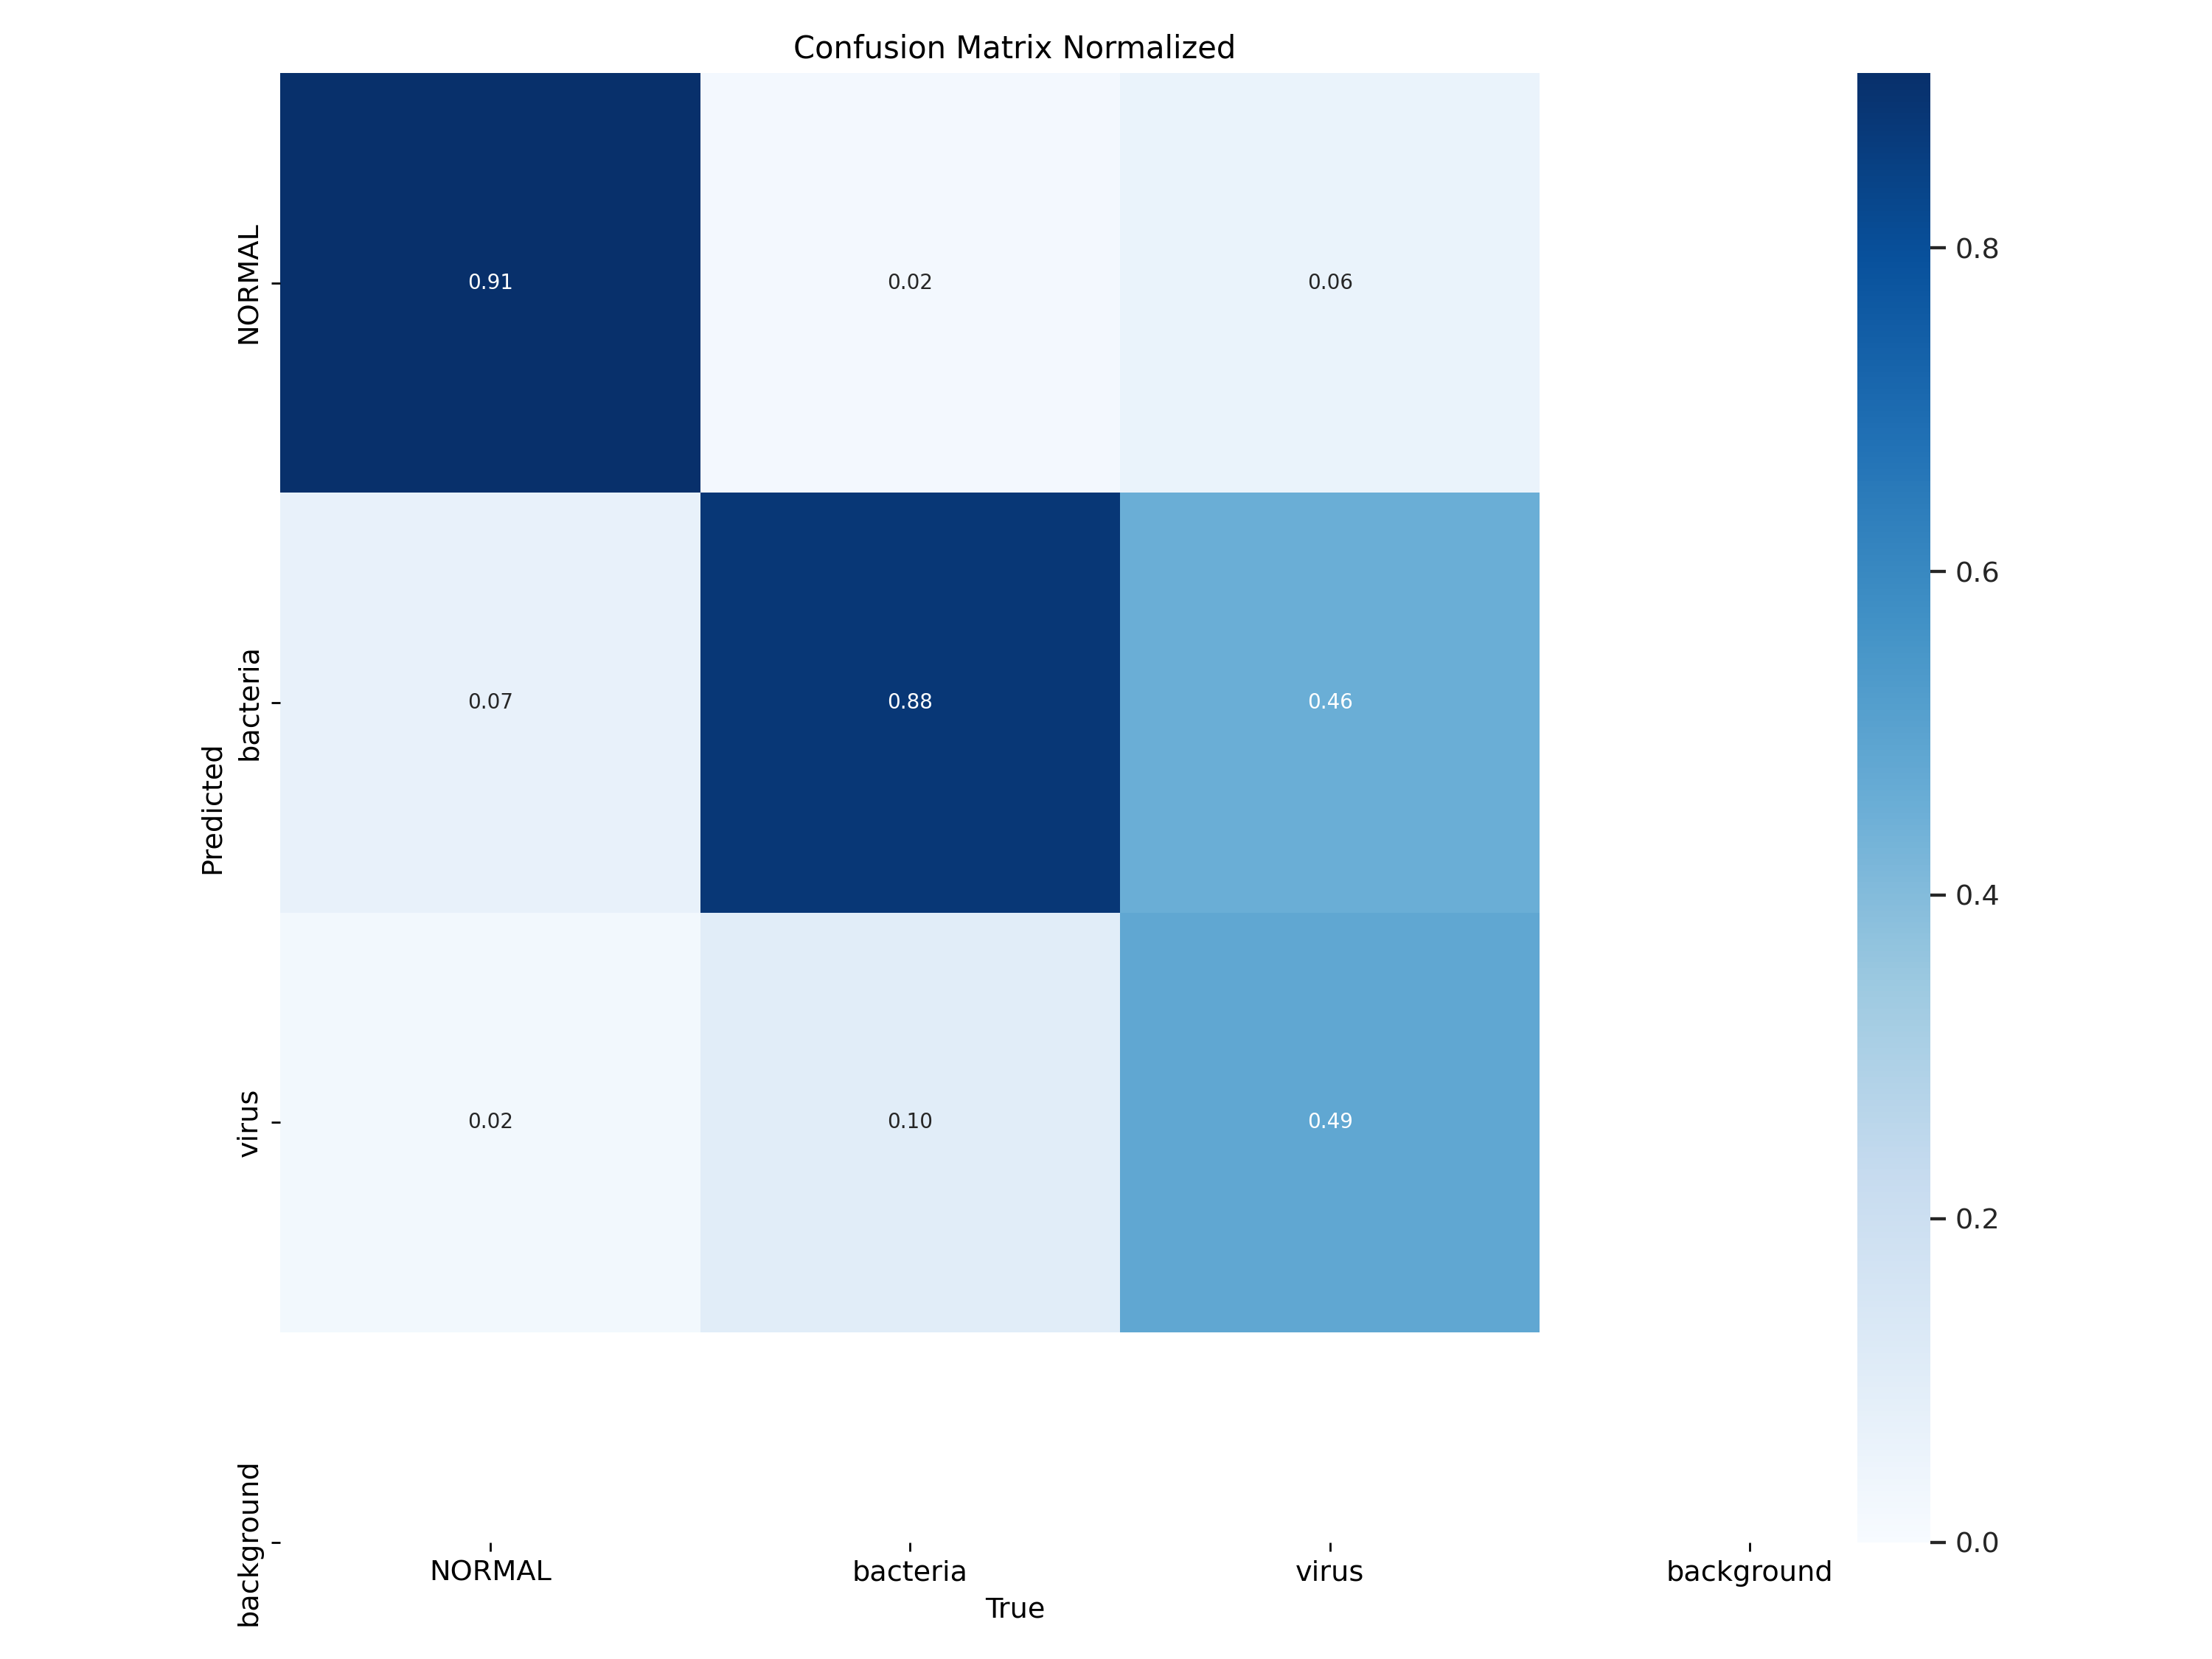

In [20]:
from IPython.display import display, Image

Image(filename=f'{classify_train_save_dir}/confusion_matrix_normalized.png',width=600)

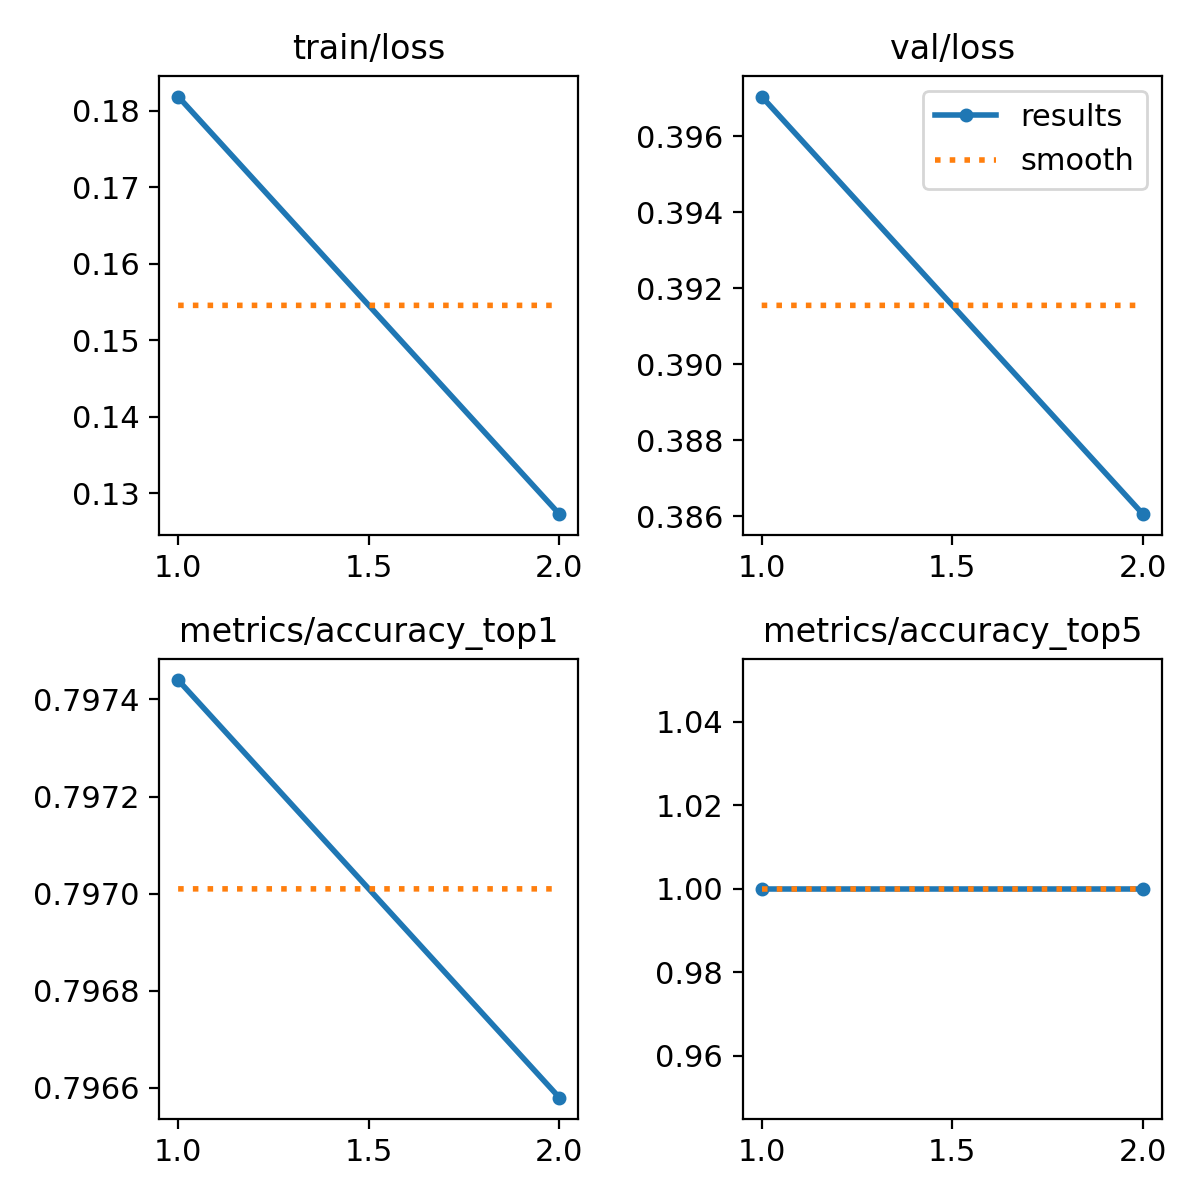

In [21]:
Image(filename=f'{classify_train_save_dir}/results.png',width=600)

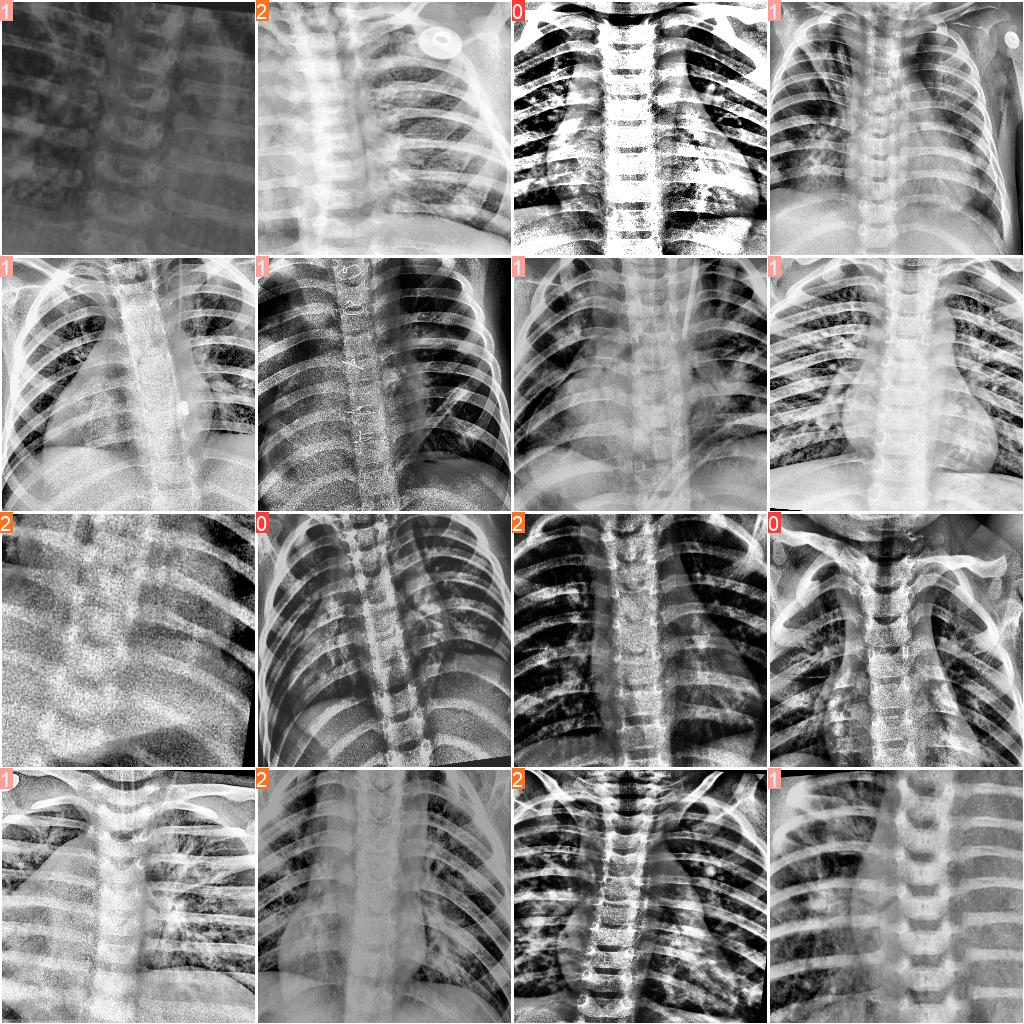

In [22]:
Image(filename=f'{classify_train_save_dir}/train_batch1.jpg',width=600)

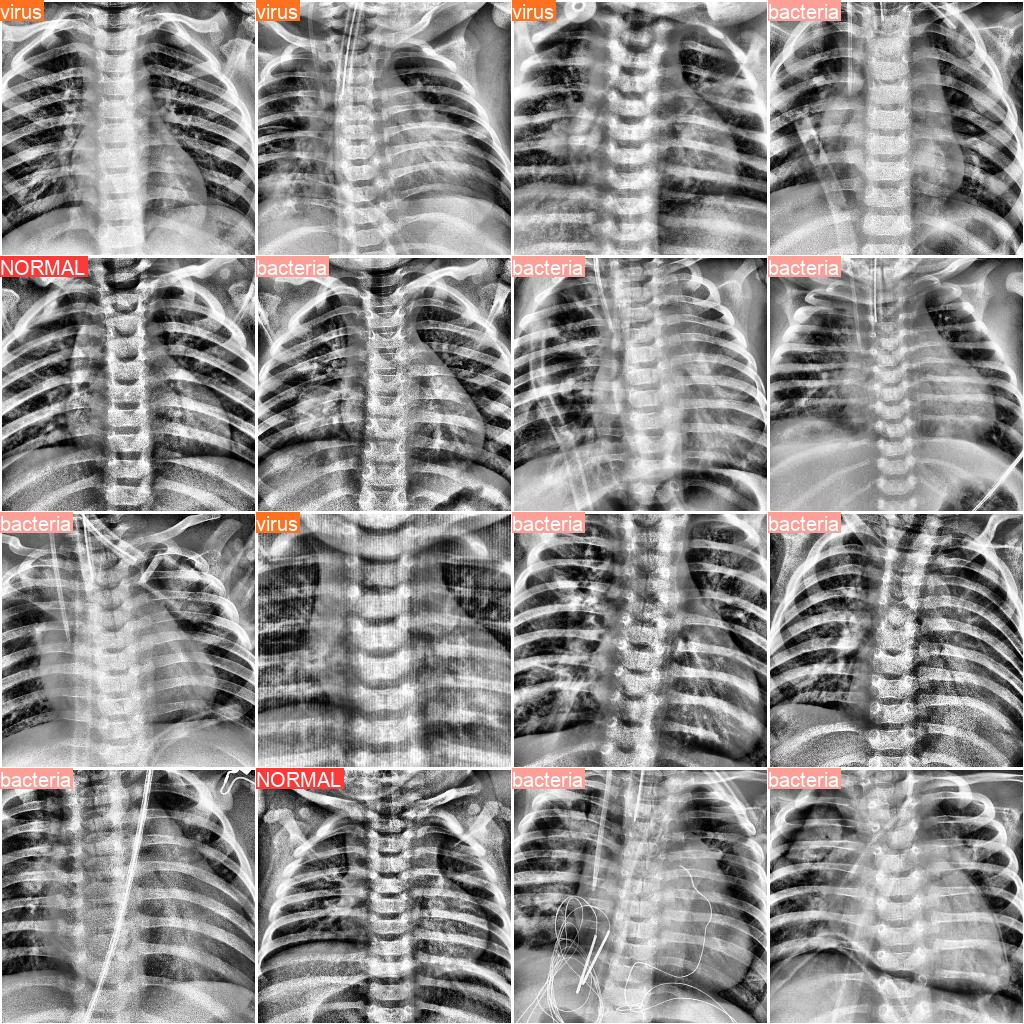

In [23]:
Image(filename=f'{classify_train_save_dir}/val_batch1_labels.jpg',width=600)

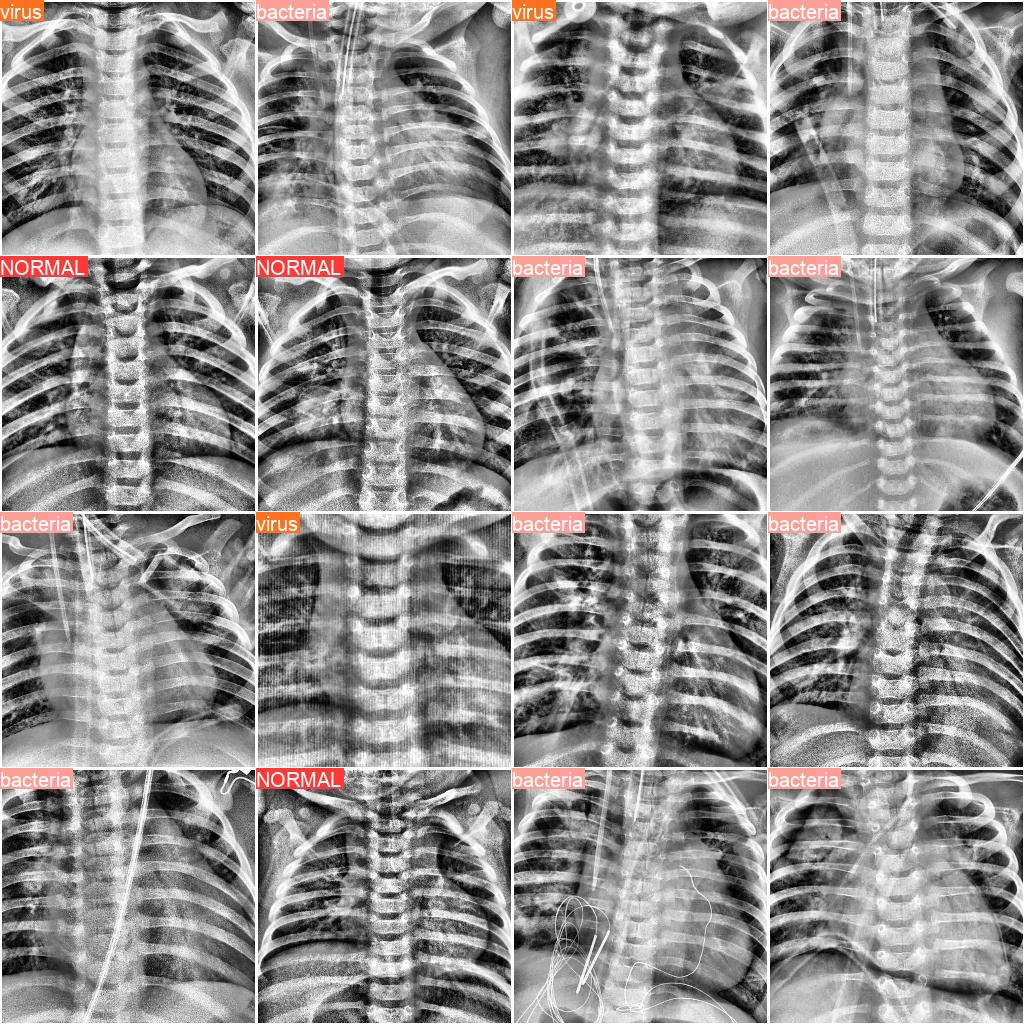

In [24]:
Image(filename=f'{classify_train_save_dir}/val_batch1_pred.jpg',width=600)

In [ ]:
""" # Podemos, en lugar de entrenar en local como hemos hecho, utilizar el modelo ya
# entrenado por roboflow e inferir en local.

from roboflow import Roboflow
rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")
project = rf.workspace().project("license-plate-recognition-rxg4e")
model = project.version(4).model.download('roboflow.pt')
 """

' # Podemos, en lugar de entrenar en local como hemos hecho, utilizar el modelo ya\n# entrenado y subido a roboflow e inferir en local. \n\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")\nproject = rf.workspace().project("license-plate-recognition-rxg4e")\nmodel = project.version(4).model.download(\'roboflow.pt\')\n '

In [ ]:

# infer on a local image
#print(model.predict("your_image.jpg", confidence=40, overlap=30).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())


# Validación

Hemos utilizado los subconjuntos train y test para entrenar a Yolov8. Se va a tomar los pesos mejor obtenidos en el entrenamiento (train2) y los vamos a usar para evaluar el modelo usanjdo el modo `val` (a diferencia del modo `classify, train o detect`). El modo `val` utiliza un conjunto de datos `val` que no ha sido usado como conjunto de datos durante el entrenamiento (utiliza train y test). Los resultados entregados por la validación son las verdaderas metricas del modelo que deberían preocuparnos.

In [26]:
from ultralytics import YOLO

model = YOLO(f'{classify_train_save_dir}/weights/best.pt') #load my custom model

classify_val = model.val(data=f'{dataset.location}', imgsz=256 ,save=True)

Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/Chest-Xray-Images-(virus,bacteri-2/train... found 8140 images in 3 classes ✅ 
val: /content/datasets/Chest-Xray-Images-(virus,bacteri-2/val... found 1170 images in 3 classes ✅ 
test: /content/datasets/Chest-Xray-Images-(virus,bacteri-2/test... found 584 images in 3 classes ✅ 
val: Scanning /content/datasets/Chest-Xray-Images-(virus,bacteri-2/val... 1170 images, 0 corrupt: 100%|██████████| 1170/1170 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/74 [00:00<?, ?it/s]


RuntimeError: ignored

In [ ]:
#classify_val_save_dir = classify_val.save_dir
classify_val_save_dir= 'runs/classify/val'
!ls -la {classify_val_save_dir}

total 1876
drwxr-xr-x 2 root root   4096 Oct 24 17:44 .
drwxr-xr-x 6 root root   4096 Oct 24 17:44 ..
-rw-r--r-- 1 root root 114610 Oct 24 17:44 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 115161 Oct 24 17:44 confusion_matrix.png
-rw-r--r-- 1 root root 272388 Oct 24 17:44 val_batch0_labels.jpg
-rw-r--r-- 1 root root 272041 Oct 24 17:44 val_batch0_pred.jpg
-rw-r--r-- 1 root root 277968 Oct 24 17:44 val_batch1_labels.jpg
-rw-r--r-- 1 root root 277791 Oct 24 17:44 val_batch1_pred.jpg
-rw-r--r-- 1 root root 284243 Oct 24 17:44 val_batch2_labels.jpg
-rw-r--r-- 1 root root 284186 Oct 24 17:44 val_batch2_pred.jpg


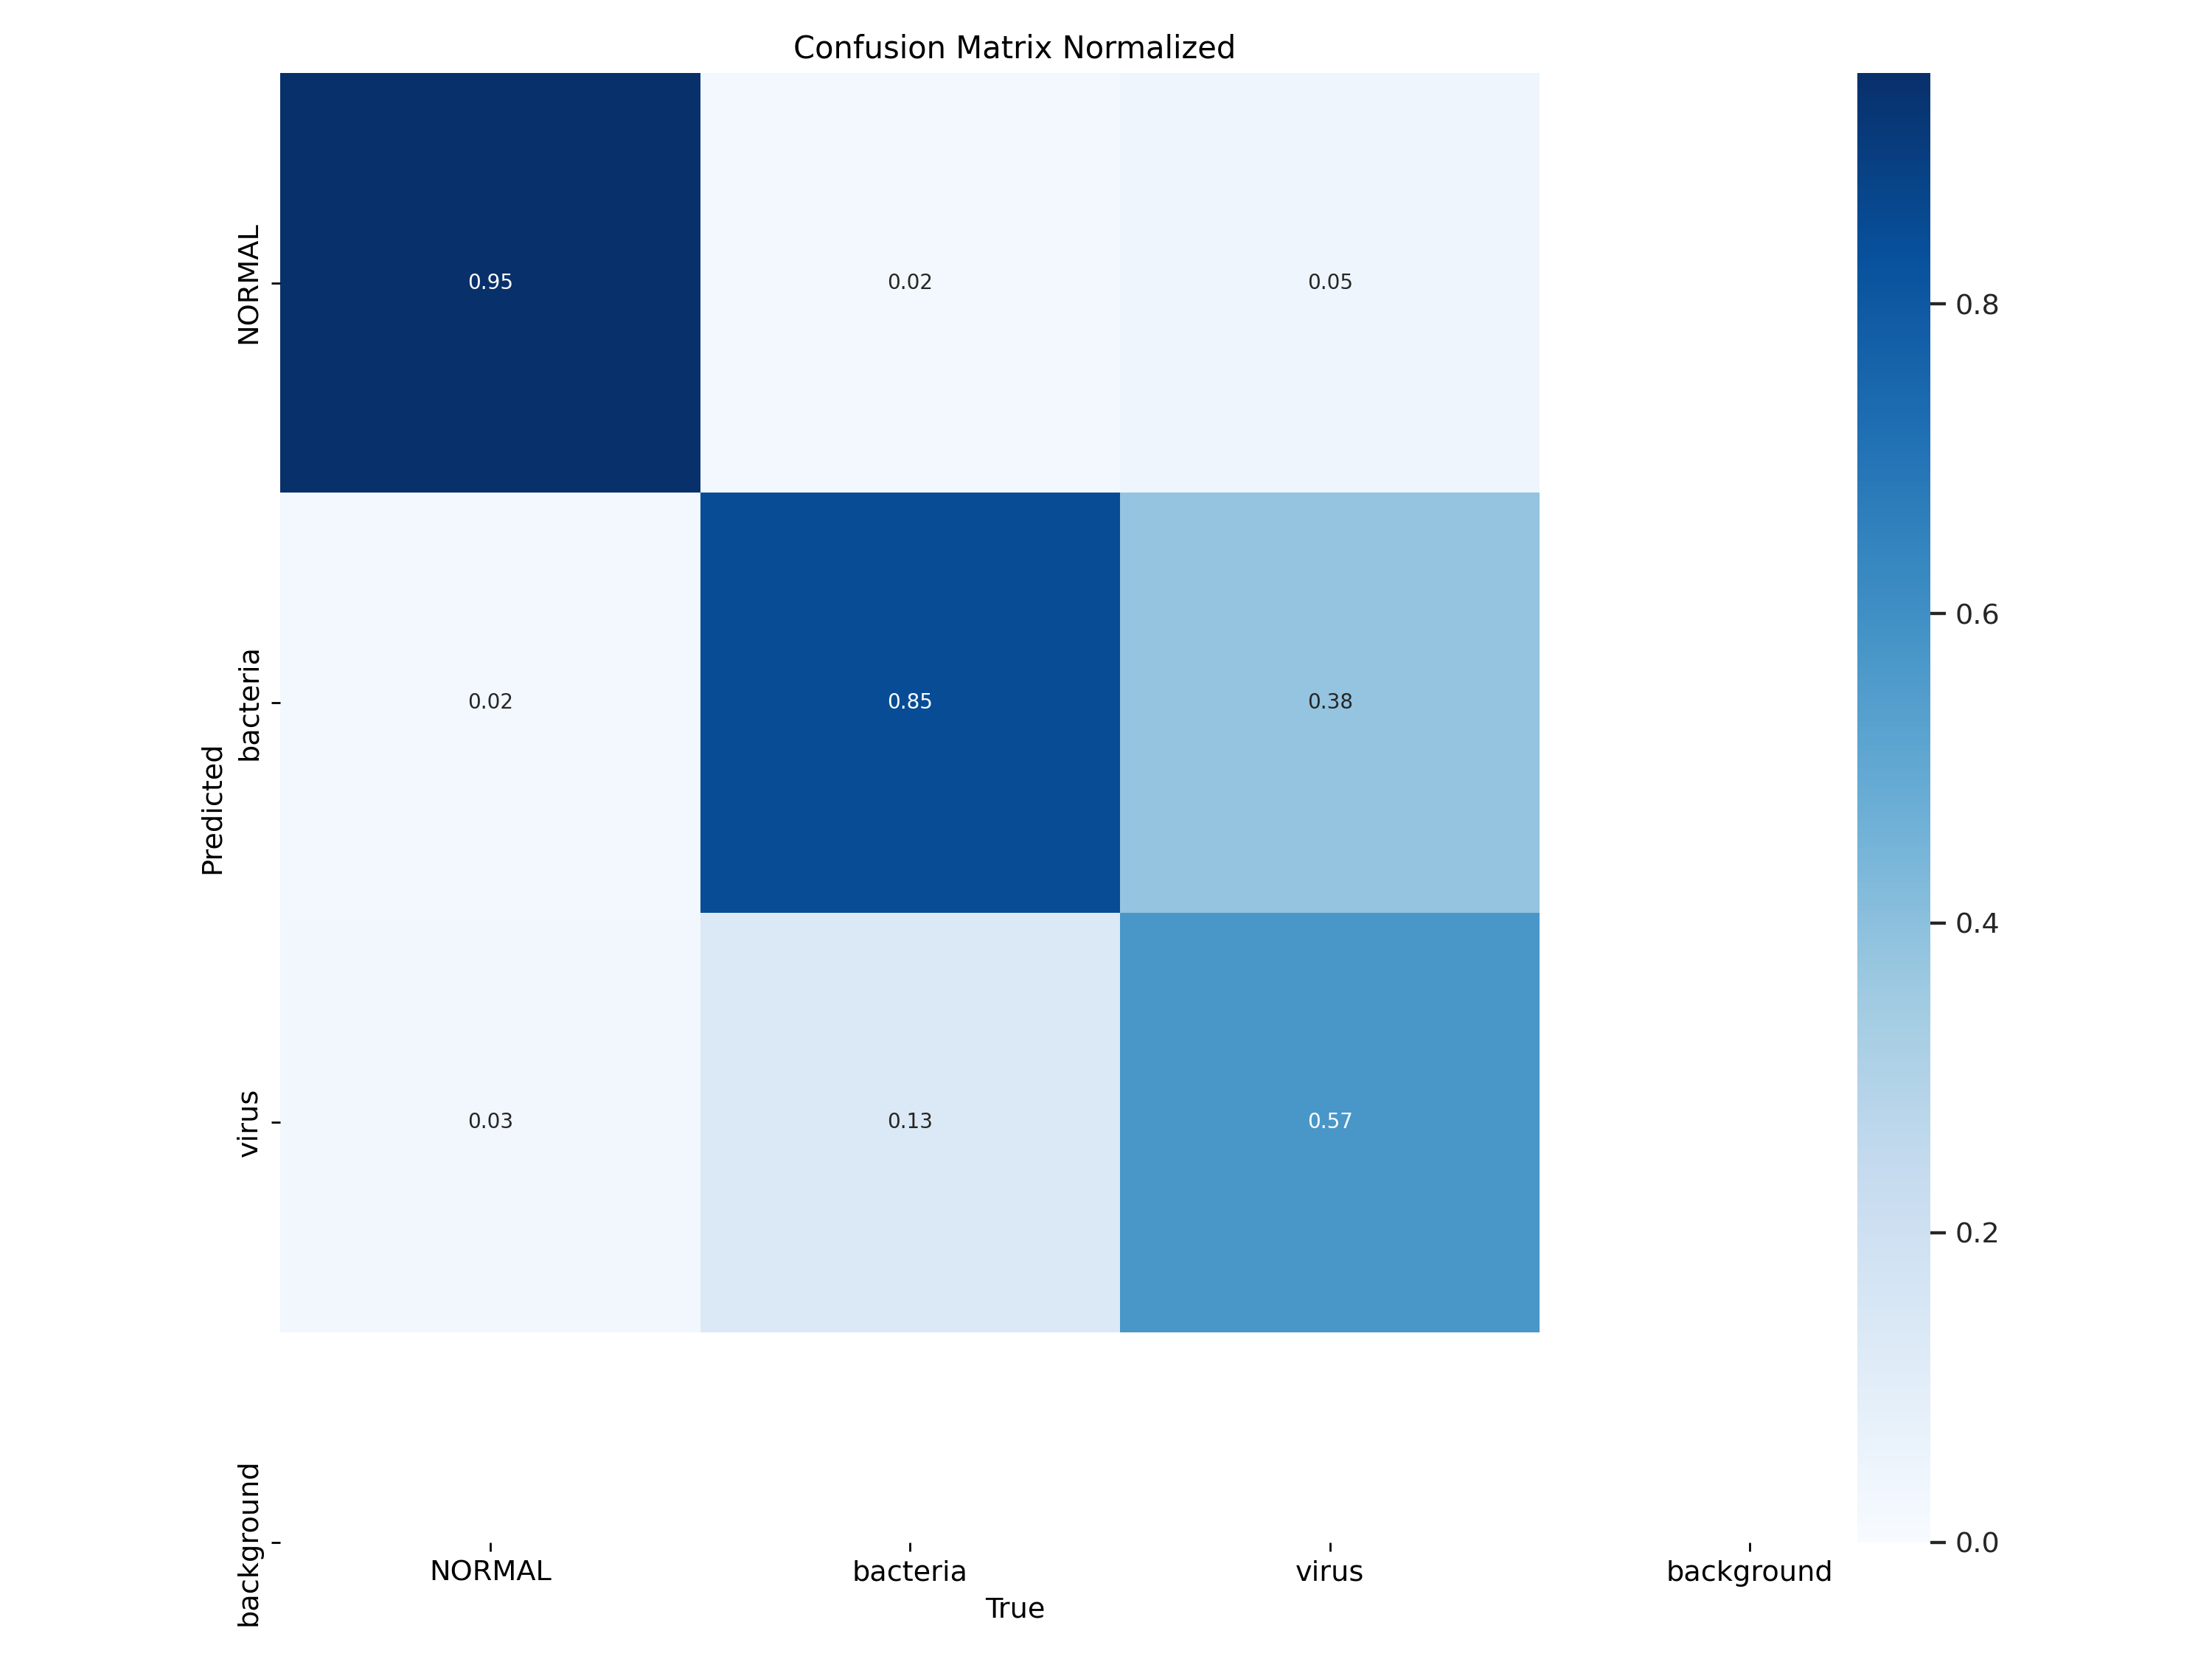

In [ ]:
Image(filename=f'{classify_val_save_dir}/confusion_matrix_normalized.png',width=600)

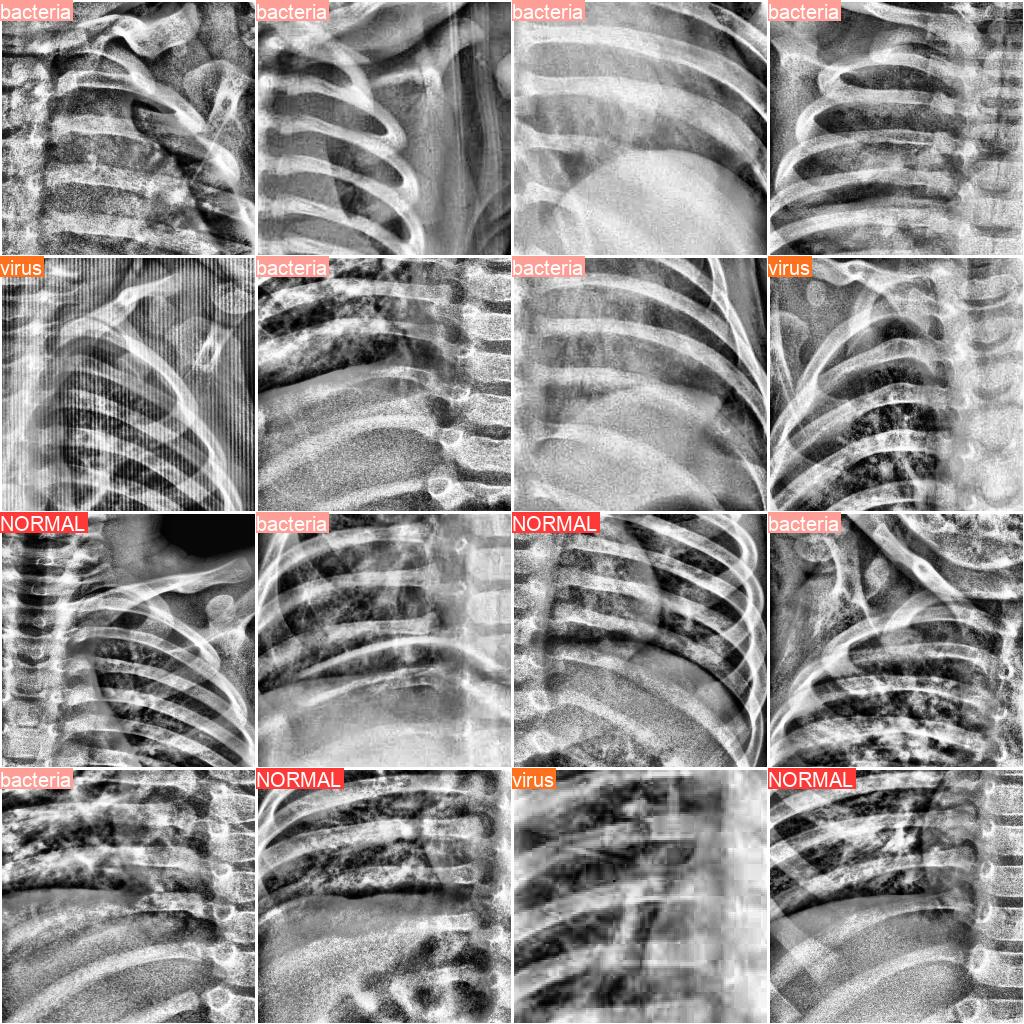

In [ ]:
Image(filename=f'{classify_val_save_dir}/val_batch0_labels.jpg',width=600)

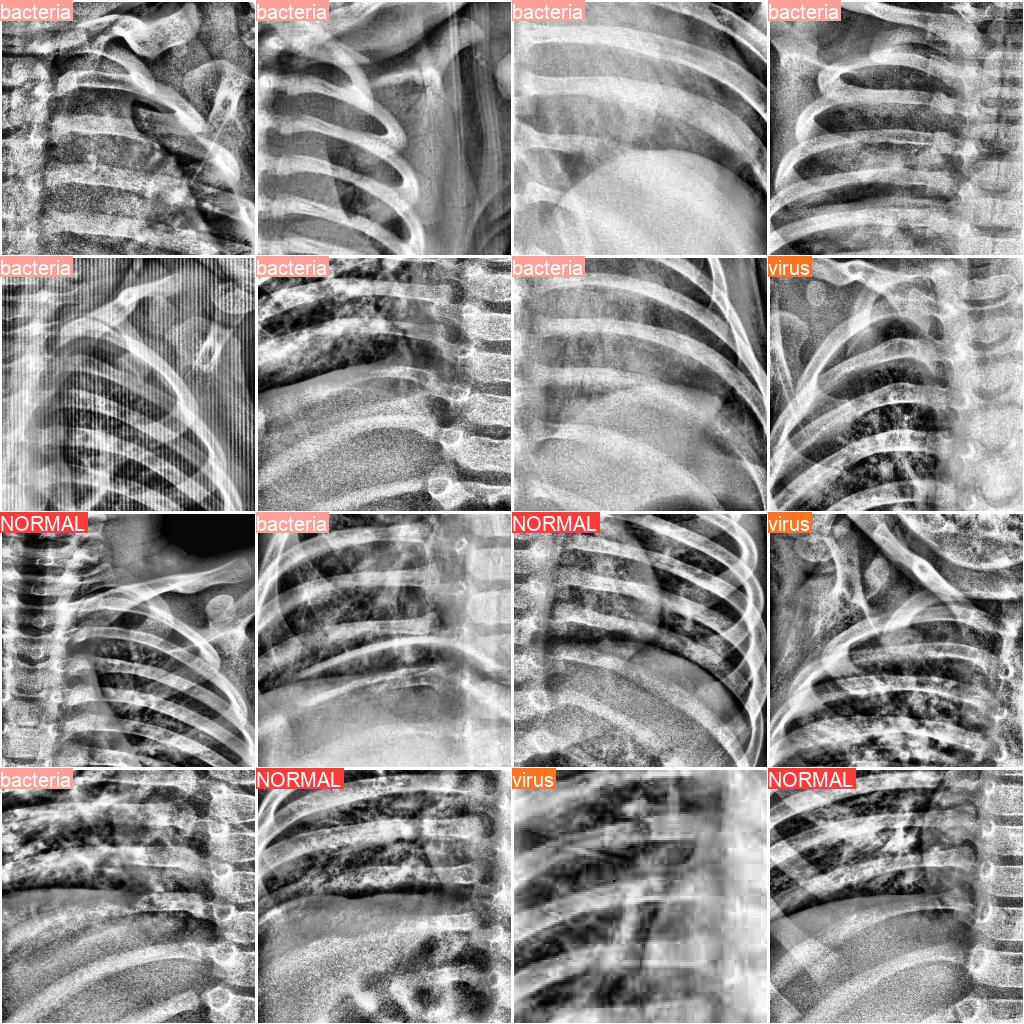

In [ ]:
Image(filename=f'{classify_val_save_dir}/val_batch0_pred.jpg',width=600)